In [23]:
import os
import numpy as np
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import json
from sklearn.metrics import mean_squared_error
from collections import defaultdict

In [24]:
def cargar_vectores_agarre(carpeta, key_ejercicio, emg_key='emg'):
    archivos = [f for f in os.listdir(carpeta) if f.endswith('.mat') and key_ejercicio in f]
    vectores = [] 
    for archivo in archivos:
        path = os.path.join(carpeta, archivo)
        data = loadmat(path)
        emg = data[emg_key] # Señal EMG cruda       
        # Calcular RMS sobre la señal ya limpia
        vec = np.sqrt(np.mean(np.square(emg), axis=0))
        vectores.append(vec)
        
    return vectores, archivos

In [25]:
db1_path = './utils/ninaproDB1/'
db2_path = './utils/ninaproDB2/'

db1_bottle_key = 'E2'
db2_bottle_key = 'E1_A1'

vectores_db1, archivos_db1 = cargar_vectores_agarre(db1_path, db1_bottle_key)
vectores_db2, archivos_db2 = cargar_vectores_agarre(db2_path, db2_bottle_key)

norm_db1 = None
norm_db2 = None

if vectores_db1:
    ideal_db1 = np.mean(vectores_db1, axis=0)
    norm_db1 = (ideal_db1 - ideal_db1.min()) / (ideal_db1.max() - ideal_db1.min())
    print("\nAgarre ideal bottle (DB1, normalizado):\n", np.round(norm_db1, 3))
    print("Archivos usados DB1:", len(archivos_db1))

if vectores_db2:
    ideal_db2 = np.mean(vectores_db2, axis=0)
    norm_db2 = (ideal_db2 - ideal_db2.min()) / (ideal_db2.max() - ideal_db2.min())
    print("\nAgarre ideal bottle (DB2, normalizado):\n", np.round(norm_db2, 3))
    print("Archivos usados DB2:", len(archivos_db2))

max_channels = max(len(norm_db1) if norm_db1 is not None else 0, len(norm_db2) if norm_db2 is not None else 0)
rows = []
for i in range(max_channels):
    ch_name = f'ch{i}'
    db1_val = round(norm_db1[i], 3) if norm_db1 is not None and i < len(norm_db1) else None
    db2_val = round(norm_db2[i], 3) if norm_db2 is not None and i < len(norm_db2) else None
    rows.append({'Canal': ch_name, 'DB1': db1_val, 'DB2': db2_val})

df = pd.DataFrame(rows)
print("\nTabla comparativa de agarre ideal (bottle) DB1 vs DB2:\n")
print(df)

df.to_csv('agarre_ideal_bottle_comparacion.csv', index=False)

print(df.to_markdown(index=False))


Agarre ideal bottle (DB1, normalizado):
 [0.536 0.499 0.534 0.293 0.    0.113 1.    0.841 0.553 0.666]
Archivos usados DB1: 27

Agarre ideal bottle (DB2, normalizado):
 [0.728 0.289 0.281 0.358 0.006 0.081 0.742 0.693 0.387 1.    0.066 0.   ]
Archivos usados DB2: 40

Tabla comparativa de agarre ideal (bottle) DB1 vs DB2:

   Canal    DB1    DB2
0    ch0  0.536  0.728
1    ch1  0.499  0.289
2    ch2  0.534  0.281
3    ch3  0.293  0.358
4    ch4  0.000  0.006
5    ch5  0.113  0.081
6    ch6  1.000  0.742
7    ch7  0.841  0.693
8    ch8  0.553  0.387
9    ch9  0.666  1.000
10  ch10    NaN  0.066
11  ch11    NaN  0.000
| Canal   |     DB1 |   DB2 |
|:--------|--------:|------:|
| ch0     |   0.536 | 0.728 |
| ch1     |   0.499 | 0.289 |
| ch2     |   0.534 | 0.281 |
| ch3     |   0.293 | 0.358 |
| ch4     |   0     | 0.006 |
| ch5     |   0.113 | 0.081 |
| ch6     |   1     | 0.742 |
| ch7     |   0.841 | 0.693 |
| ch8     |   0.553 | 0.387 |
| ch9     |   0.666 | 1     |
| ch10    | nan 

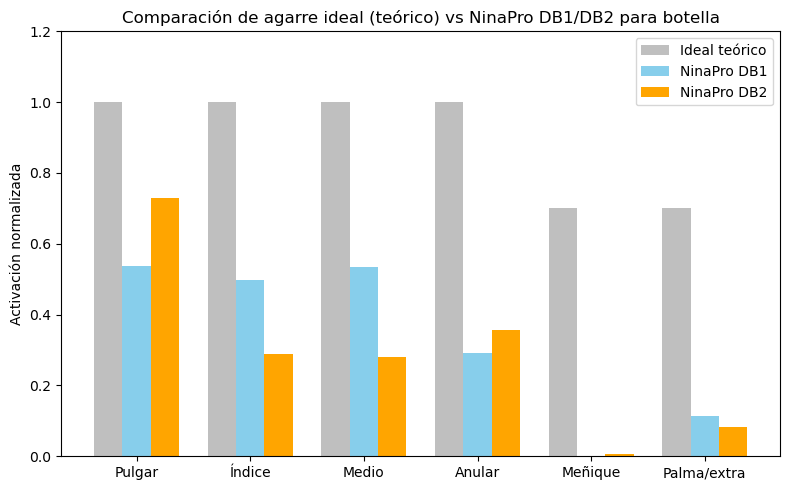

In [26]:
dedos = ["Pulgar", "Índice", "Medio", "Anular", "Meñique", "Palma/extra"]

agarre_ideal_real = [1, 1, 1, 1, 0.7, 0.7]
agarre_ninapro_db1 = norm_db1[:6]  # tus valores reales DB1
agarre_ninapro_db2 = norm_db2[:6]  # tus valores reales DB2

x = np.arange(len(dedos))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, agarre_ideal_real, width, label="Ideal teórico", color='gray', alpha=0.5)
plt.bar(x, agarre_ninapro_db1, width, label="NinaPro DB1", color='skyblue')
plt.bar(x + width, agarre_ninapro_db2, width, label="NinaPro DB2", color='orange')
plt.xticks(x, dedos)
plt.ylabel("Activación normalizada")
plt.ylim(0, 1.2)
plt.title("Comparación de agarre ideal (teórico) vs NinaPro DB1/DB2 para botella")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
db1_path = './utils/ninaproDB1/'
db2_path = './utils/ninaproDB2/'

db1_bottle_key = 'E2'
db2_bottle_key = 'E1_A1'

vectores_db1, archivos_db1 = cargar_vectores_agarre(db1_path, db1_bottle_key)
vectores_db2, archivos_db2 = cargar_vectores_agarre(db2_path, db2_bottle_key)

norm_db1 = None
norm_db2 = None

if vectores_db1:
    ideal_db1 = np.median(vectores_db1, axis=0)
    norm_db1 = (ideal_db1 - ideal_db1.min()) / (ideal_db1.max() - ideal_db1.min())
    print("\nAgarre ideal bottle (DB1, normalizado):\n", np.round(norm_db1, 3))
    print("Archivos usados DB1:", len(archivos_db1))

if vectores_db2:
    ideal_db2 = np.median(vectores_db2, axis=0)
    norm_db2 = (ideal_db2 - ideal_db2.min()) / (ideal_db2.max() - ideal_db2.min())
    print("\nAgarre ideal bottle (DB2, normalizado):\n", np.round(norm_db2, 3))
    print("Archivos usados DB2:", len(archivos_db2))

max_channels = max(len(norm_db1) if norm_db1 is not None else 0, len(norm_db2) if norm_db2 is not None else 0)
rows = []
for i in range(max_channels):
    ch_name = f'ch{i}'
    db1_val = round(norm_db1[i], 3) if norm_db1 is not None and i < len(norm_db1) else None
    db2_val = round(norm_db2[i], 3) if norm_db2 is not None and i < len(norm_db2) else None
    rows.append({'Canal': ch_name, 'DB1': db1_val, 'DB2': db2_val})

df = pd.DataFrame(rows)
print("\nTabla comparativa de agarre ideal (bottle) DB1 vs DB2:\n")
print(df)

df.to_csv('agarre_ideal_bottle_comparacion.csv', index=False)

print(df.to_markdown(index=False))


Agarre ideal bottle (DB1, normalizado):
 [0.569 0.504 0.513 0.265 0.    0.099 1.    0.931 0.543 0.755]
Archivos usados DB1: 27

Agarre ideal bottle (DB2, normalizado):
 [0.753 0.396 0.359 0.289 0.009 0.    0.445 0.835 0.42  1.    0.087 0.004]
Archivos usados DB2: 40

Tabla comparativa de agarre ideal (bottle) DB1 vs DB2:

   Canal    DB1    DB2
0    ch0  0.569  0.753
1    ch1  0.504  0.396
2    ch2  0.513  0.359
3    ch3  0.265  0.289
4    ch4  0.000  0.009
5    ch5  0.099  0.000
6    ch6  1.000  0.445
7    ch7  0.931  0.835
8    ch8  0.543  0.420
9    ch9  0.755  1.000
10  ch10    NaN  0.087
11  ch11    NaN  0.004
| Canal   |     DB1 |   DB2 |
|:--------|--------:|------:|
| ch0     |   0.569 | 0.753 |
| ch1     |   0.504 | 0.396 |
| ch2     |   0.513 | 0.359 |
| ch3     |   0.265 | 0.289 |
| ch4     |   0     | 0.009 |
| ch5     |   0.099 | 0     |
| ch6     |   1     | 0.445 |
| ch7     |   0.931 | 0.835 |
| ch8     |   0.543 | 0.42  |
| ch9     |   0.755 | 1     |
| ch10    | nan 

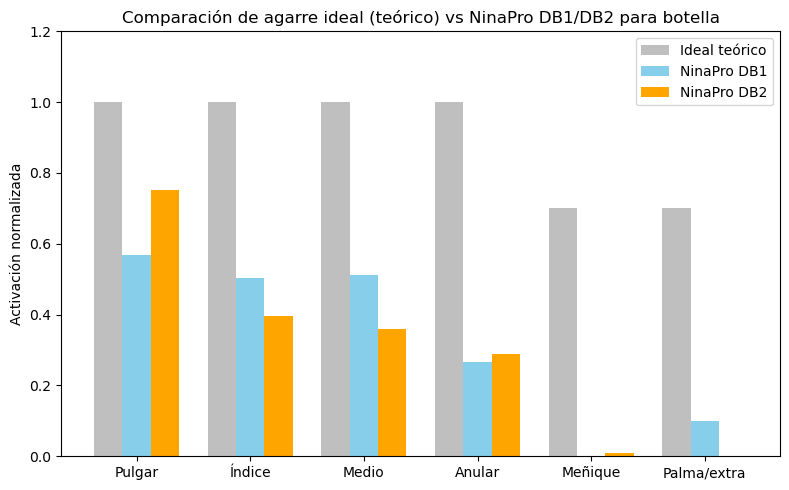

In [28]:
dedos = ["Pulgar", "Índice", "Medio", "Anular", "Meñique", "Palma/extra"]

agarre_ideal_real = [1, 1, 1, 1, 0.7, 0.7]
agarre_ninapro_db1 = norm_db1[:6]  # tus valores reales DB1
agarre_ninapro_db2 = norm_db2[:6]  # tus valores reales DB2

x = np.arange(len(dedos))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, agarre_ideal_real, width, label="Ideal teórico", color='gray', alpha=0.5)
plt.bar(x, agarre_ninapro_db1, width, label="NinaPro DB1", color='skyblue')
plt.bar(x + width, agarre_ninapro_db2, width, label="NinaPro DB2", color='orange')
plt.xticks(x, dedos)
plt.ylabel("Activación normalizada")
plt.ylim(0, 1.2)
plt.title("Comparación de agarre ideal (teórico) vs NinaPro DB1/DB2 para botella")
plt.legend()
plt.tight_layout()
plt.show()